In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import linear_model
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cross_decomposition import PLSRegression
from sklearn import model_selection
from sklearn.preprocessing import scale
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score



# Prepocess data set

In [377]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/hitters.csv').replace('NAN', np.nan).dropna().drop('Unnamed: 0', axis=1)
df.info()
dummies = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df.Salary

# Drop the column with the independent variable (Salary), and columns for which we created dummy variables
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')

# Define the feature set X.
X = pd.concat([X_, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

# Split into training and test sets
X_train, X_test , y_train, y_test = model_selection.train_test_split(X, y, test_size=0.5, random_state=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    object 
 14  Division   263 non-null    object 
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263 non-null    object 
dtypes: float64

# Methods for PCR and PLS CV

In [0]:
def pcr(X,y,pc):
  pca = PCA()
  # Scale the data
  X_reduced = pca.fit_transform(scale(X_train))

  plt.figure(0)
  plt.plot(np.cumsum(pca.explained_variance_ratio_))
  plt.xlabel('Number of principal components')
  plt.ylabel('Explained variance')

  mse = []
  regr = linear_model.LinearRegression()
  kf_10 = KFold(n_splits=10, shuffle=True, random_state=1)
  n = len(X_reduced)

  score = cross_val_score(regr, np.ones((n,1)), y.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()    
  mse.append(-score)

  for i in np.arange(1, pc):
    score = cross_val_score(regr, X_reduced[:,:i], y, cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(-score)

  plt.figure(1)
  plt.plot(np.arange(0, pc), np.array(mse))

  plt.xlabel('Number of principal components in PCR')
  plt.ylabel('MSE')
  plt.title('Salary')
  plt.xlim(xmin=-1)

In [0]:
def pls(X,y,pc):
  mse = []
  regr = linear_model.LinearRegression()
  kf_10 = KFold(n_splits=10, shuffle=True, random_state=1)
  for i in np.arange(1, pc):
    # Define PLS object
    pls = PLSRegression(n_components=i)
    score = cross_val_score(pls, scale(X), y, cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(-score)

  plt.figure(1)
  plt.plot(np.arange(1, pc), np.array(mse))

  plt.xlabel('Number of principal components in PLS')
  plt.ylabel('MSE')
  plt.title('Salary')
  plt.xlim(xmin=-1)
  return mse

# PCR and PLS on training and test set

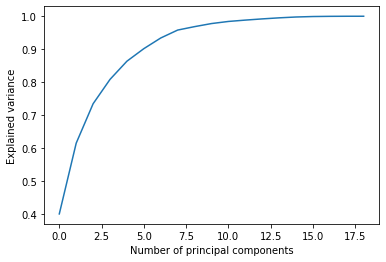

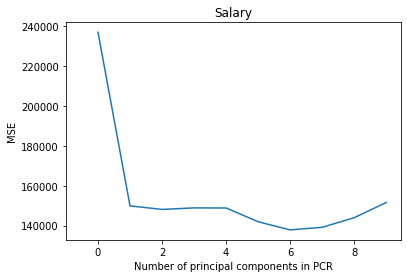

In [380]:
#PCR on training data
pcr(X_train,y_train,10)

114098.056320663

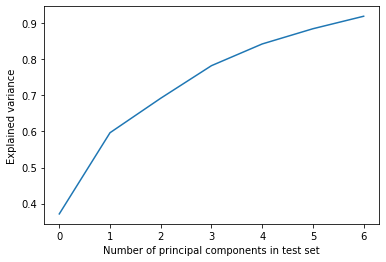

In [381]:
#PCR on test data
pca1 = PCA(n_components=7).fit(scale(X_test))
X_reduced_test = pca1.transform(scale(X_test))

pca2 = PCA()
X_reduced_train = pca2.fit_transform(scale(X_train))
n = len(X_reduced_train)

# Train regression model on training data 
regr = linear_model.LinearRegression()
regr.fit(X_reduced_train[:,:7], y_train)

# Prediction with test data
pred = regr.predict(X_reduced_test)
mean_squared_error(y_test, pred)

plt.figure(0)
plt.plot(np.cumsum(pca1.explained_variance_ratio_))
plt.xlabel('Number of principal components in test set')
plt.ylabel('Explained variance')

mean_squared_error(y_test, pred)

[145200.30879176184,
 143563.7116680996,
 144884.21939481172,
 149848.25720638392,
 159751.97952196226,
 165610.2817654296,
 160934.90620140574,
 147593.60747770726,
 148661.1699303658]

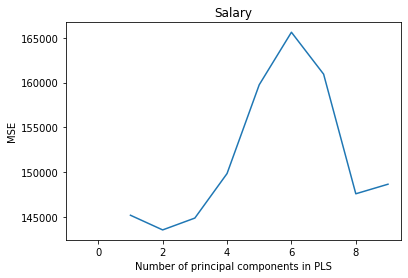

In [382]:
#PLS on training data
pls(X_train,y_train,10)

In [383]:
#PLS on test data
pls = PLSRegression(n_components=2)
pls.fit(scale(X_train), y_train)

mean_squared_error(y_test, pls.predict(scale(X_test)))

104838.51042760801